In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# !pip install -q ISLP
import ISLP
from ISLP.models import summarize
import statsmodels.api as sm

from sklearn.model_selection import train_test_split


In [16]:
# Read the data and create interaction terms
advertising_df = pd.read_csv("Advertising.csv", index_col=0)
advertising_df['TV*radio'] = advertising_df['TV'] * advertising_df['radio']
advertising_df['TV*newspaper'] = advertising_df['TV'] * advertising_df['newspaper']
advertising_df['radio*newspaper'] = advertising_df['radio'] * advertising_df['newspaper']
advertising_df['TV*radio*newspaper'] = advertising_df['TV'] * advertising_df['radio'] * advertising_df['newspaper']
advertising_df['intercept'] = 1

# Define a function to calculate mean squared error (MSE) for train and test datasets
def get_train_test_mse_predictions(y_var, xvars, train_df, test_df):
    model = sm.OLS(train_df[y_var], train_df[xvars])  # Create an Ordinary Least Squares (OLS) model
    model_fit = model.fit()  # Fit the model to the training data
    train_y_hat = model_fit.predict(train_df[xvars])  # Predict values for the training data
    test_y_hat = model_fit.predict(test_df[xvars])  # Predict values for the test data
    train_mse = ((train_df[y_var] - train_y_hat) ** 2).mean()  # Calculate mean squared error for the training data
    test_mse = ((test_df[y_var] - test_y_hat) ** 2).mean()  # Calculate mean squared error for the test data

    print(xvars)
    print("Train MSE:", train_mse)
    print("Test MSE:", test_mse)
    print()
    return test_mse  # Return the test MSE for comparison

# Define target variable and predictor variables
y_var = 'sales'
x_vars_1 = ['intercept', 'TV', 'radio', 'newspaper']
x_vars_2 = ['intercept', 'TV', 'radio', 'newspaper', 'TV*radio']
x_vars_3 = ['intercept', 'TV', 'radio', 'newspaper', 'TV*newspaper']
x_vars_4 = ['intercept', 'TV', 'radio', 'newspaper', 'radio*newspaper']
x_vars_5 = ['intercept', 'TV', 'radio', 'newspaper', 'TV*radio*newspaper']

# Try different test sizes to find the best model
best_model = None
best_test_mse = float('inf')  # Initialize the best test MSE to infinity
best_test_size = None
best_mse_for_best_model = None

# Define test sizes to evaluate
test_sizes = [0.05, 0.1, 0.15, 0.2, 0.25, 0.3]


for test_size in test_sizes:
    # Perform train-test split
    train_df, test_df = train_test_split(advertising_df, test_size=test_size, random_state=42)
    
    # Calculate test MSE for each model
    test_mse_1 = get_train_test_mse_predictions(y_var, x_vars_1, train_df, test_df)
    test_mse_2 = get_train_test_mse_predictions(y_var, x_vars_2, train_df, test_df)
    test_mse_3 = get_train_test_mse_predictions(y_var, x_vars_3, train_df, test_df)
    test_mse_4 = get_train_test_mse_predictions(y_var, x_vars_4, train_df, test_df)
    test_mse_5 = get_train_test_mse_predictions(y_var, x_vars_5, train_df, test_df)
    
    # Determine the best model for the current test size
    test_mses = [test_mse_1, test_mse_2, test_mse_3, test_mse_4, test_mse_5]
    min_test_mse = min(test_mses)
    min_model_index = test_mses.index(min_test_mse) + 1  # Model index is 1-based
    
    # If the current best model's test MSE is less than the previously recorded best, update the best model
    if min_test_mse < best_test_mse:
        best_test_mse = min_test_mse
        best_test_size = test_size
        best_model = min_model_index
        best_mse_for_best_model = min_test_mse

print(f'Best model: Model {best_model} with test size: {best_test_size} and Test MSE: {best_mse_for_best_model}')

['intercept', 'TV', 'radio', 'newspaper']
Train MSE: 2.7902497056243574
Test MSE: 2.7384968202842224

['intercept', 'TV', 'radio', 'newspaper', 'TV*radio']
Train MSE: 0.8988145055519892
Test MSE: 0.3596034758545533

['intercept', 'TV', 'radio', 'newspaper', 'TV*newspaper']
Train MSE: 2.6238775926580464
Test MSE: 2.5224557710487336

['intercept', 'TV', 'radio', 'newspaper', 'radio*newspaper']
Train MSE: 2.7761796006911017
Test MSE: 2.9117460501775465

['intercept', 'TV', 'radio', 'newspaper', 'TV*radio*newspaper']
Train MSE: 2.0704851073315846
Test MSE: 2.7514829016233024

['intercept', 'TV', 'radio', 'newspaper']
Train MSE: 2.754315563950068
Test MSE: 3.1308020912380448

['intercept', 'TV', 'radio', 'newspaper', 'TV*radio']
Train MSE: 0.8661112504818063
Test MSE: 0.9515471094268232

['intercept', 'TV', 'radio', 'newspaper', 'TV*newspaper']
Train MSE: 2.529338094121459
Test MSE: 3.5221151761271883

['intercept', 'TV', 'radio', 'newspaper', 'radio*newspaper']
Train MSE: 2.752676905079901

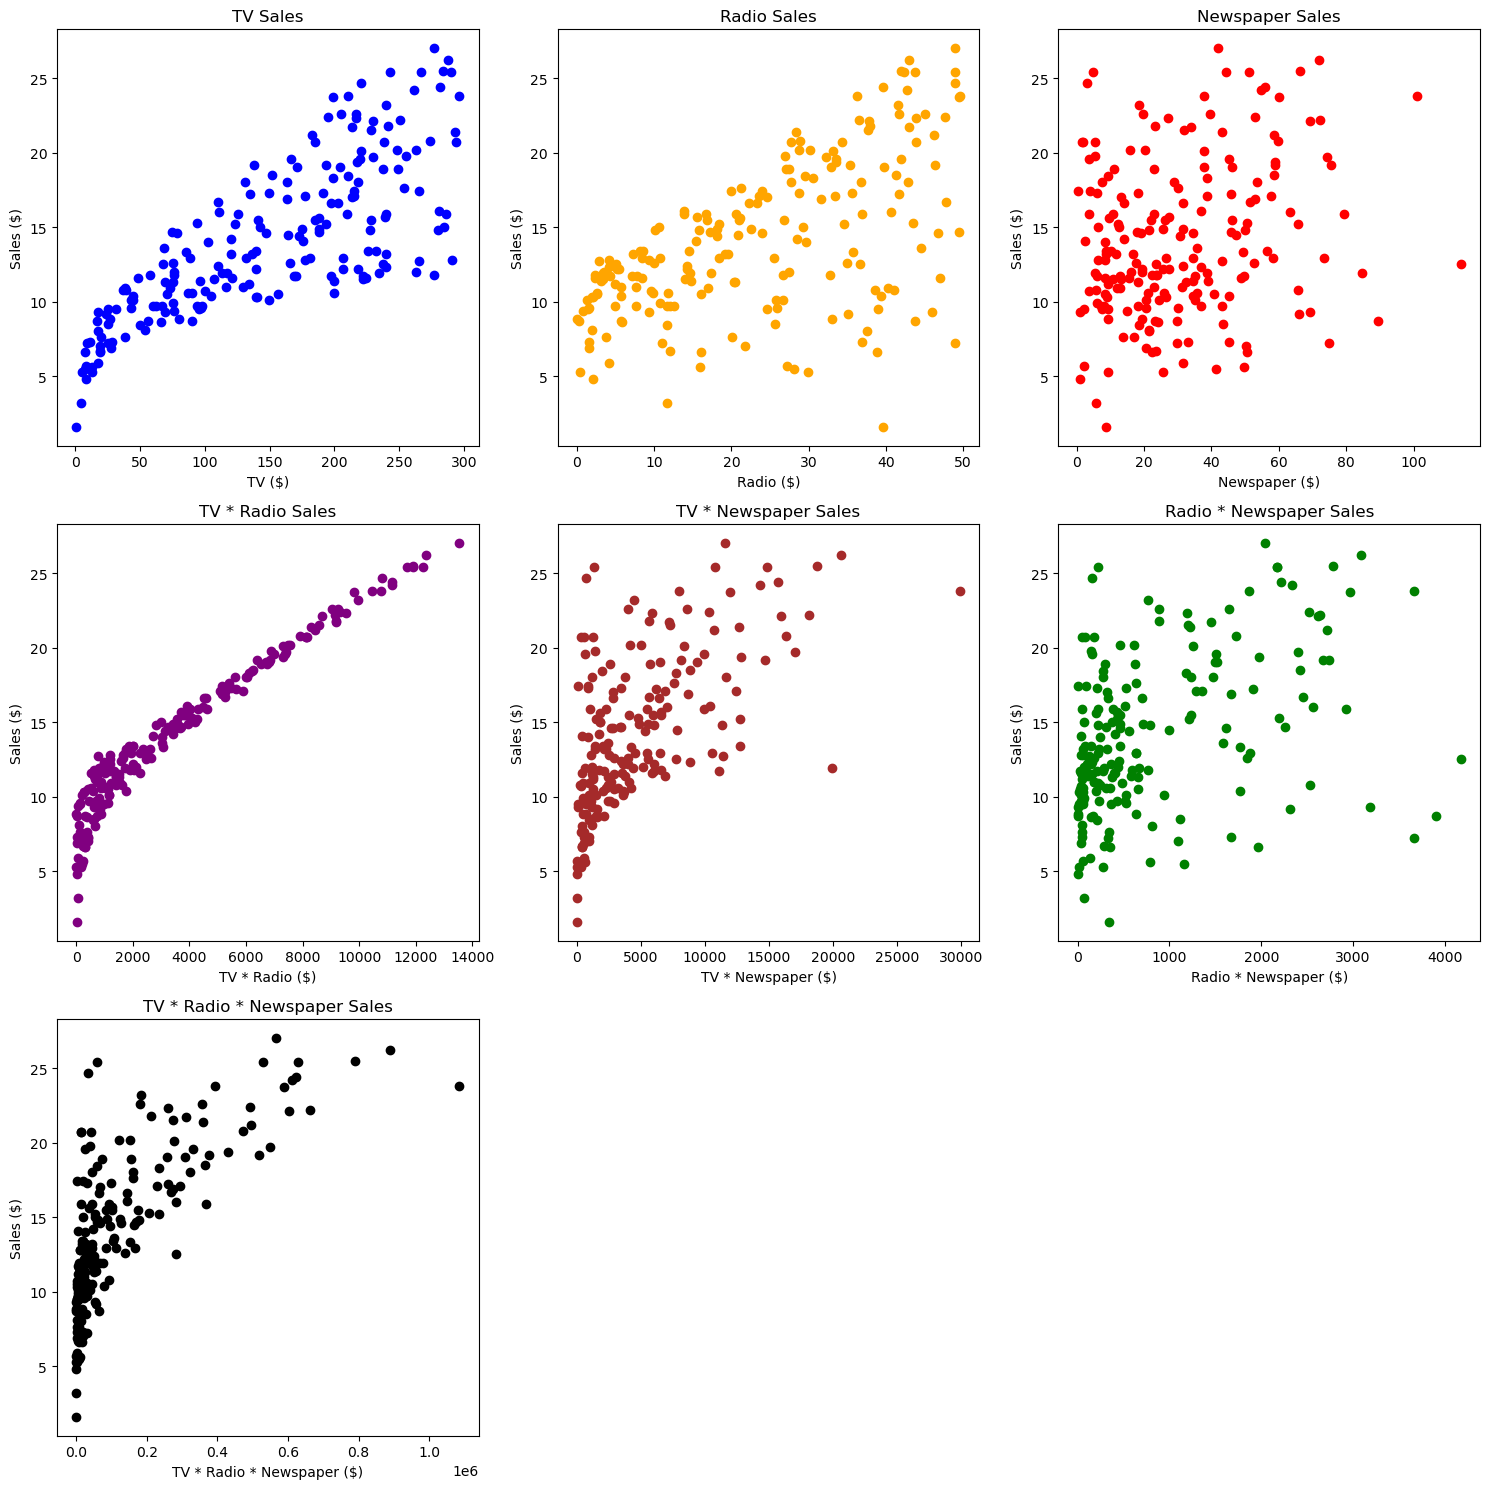

In [17]:
import matplotlib.pyplot as plt

# Create scatter plots
plt.figure(figsize=(15, 15))

# First row
plt.subplot(3, 3, 1)
plt.scatter(advertising_df['TV'], advertising_df['sales'], color='blue')
plt.title('TV Sales')
plt.xlabel('TV ($)')
plt.ylabel('Sales ($)')

plt.subplot(3, 3, 2)
plt.scatter(advertising_df['radio'], advertising_df['sales'], color='orange')
plt.title('Radio Sales')
plt.xlabel('Radio ($)')
plt.ylabel('Sales ($)')

plt.subplot(3, 3, 3)
plt.scatter(advertising_df['newspaper'], advertising_df['sales'], color='red')
plt.title('Newspaper Sales')
plt.xlabel('Newspaper ($)')
plt.ylabel('Sales ($)')

# Second row
plt.subplot(3, 3, 4)
plt.scatter(advertising_df['TV'] * advertising_df['radio'], advertising_df['sales'], color='purple')
plt.title('TV * Radio Sales')
plt.xlabel('TV * Radio ($)')
plt.ylabel('Sales ($)')

plt.subplot(3, 3, 5)
plt.scatter(advertising_df['TV'] * advertising_df['newspaper'], advertising_df['sales'], color='brown')
plt.title('TV * Newspaper Sales')
plt.xlabel('TV * Newspaper ($)')
plt.ylabel('Sales ($)')

plt.subplot(3, 3, 6)
plt.scatter(advertising_df['radio'] * advertising_df['newspaper'], advertising_df['sales'], color='green')
plt.title('Radio * Newspaper Sales')
plt.xlabel('Radio * Newspaper ($)')
plt.ylabel('Sales ($)')

# Third row: TV * Radio * Newspaper interaction
plt.subplot(3, 3, 7)
plt.scatter(advertising_df['TV'] * advertising_df['radio'] * advertising_df['newspaper'], advertising_df['sales'], color='black')
plt.title('TV * Radio * Newspaper Sales')
plt.xlabel('TV * Radio * Newspaper ($)')
plt.ylabel('Sales ($)')

plt.tight_layout()
plt.show()

TRAIN AND TEST MSE VALUES ON THE AUGMENTED DATA 

In [18]:
advertising_df = pd.read_csv("augmented.csv", index_col=0)
advertising_df['TV*radio'] = advertising_df['TV'] * advertising_df['radio']
advertising_df['TV*newspaper'] = advertising_df['TV'] * advertising_df['newspaper']
advertising_df['radio*newspaper'] = advertising_df['radio'] * advertising_df['newspaper']
advertising_df['TV*radio*newspaper'] = advertising_df['TV'] * advertising_df['radio'] * advertising_df['newspaper']
advertising_df['intercept'] = 1

# Define the test size
test_size = 0.1
# Perform the train-test split
train_df, test_df = train_test_split(advertising_df, test_size=test_size, random_state=42)

def get_train_test_mse_predictions(y_var, xvars, train_df, test_df):
    model = sm.OLS(train_df[y_var], train_df[xvars])
    model_fit = model.fit()
    train_y_hat = model_fit.predict(train_df[xvars])
    test_y_hat = model_fit.predict(test_df[xvars])
    train_mse = ((train_df[y_var] - train_y_hat)**2).mean()
    test_mse = ((test_df[y_var] - test_y_hat)**2).mean()

    print(xvars)
    print("Train MSE:", train_mse)
    print("Test MSE:", test_mse)
    print()
    return test_y_hat


y_var = 'sales'
x_vars_1 = ['intercept', 'TV', 'radio', 'newspaper']
x_vars_2 = ['intercept', 'TV', 'radio', 'newspaper', 'TV*radio']
x_vars_3 = ['intercept', 'TV', 'radio', 'newspaper', 'TV*newspaper']
x_vars_4 = ['intercept', 'TV', 'radio', 'newspaper', 'radio*newspaper']
x_vars_5 = ['intercept', 'TV', 'radio', 'newspaper', 'TV*radio*newspaper']

test_y_hat_1 = get_train_test_mse_predictions(y_var, x_vars_1, train_df, test_df)
test_y_hat_2 = get_train_test_mse_predictions(y_var, x_vars_2, train_df, test_df)
test_y_hat_3 = get_train_test_mse_predictions(y_var, x_vars_3, train_df, test_df)
test_y_hat_4 = get_train_test_mse_predictions(y_var, x_vars_4, train_df, test_df)
test_y_hat_5 = get_train_test_mse_predictions(y_var, x_vars_5, train_df, test_df)



['intercept', 'TV', 'radio', 'newspaper']
Train MSE: 2.3173243995619157
Test MSE: 2.205883730953296

['intercept', 'TV', 'radio', 'newspaper', 'TV*radio']
Train MSE: 0.9432885327596748
Test MSE: 0.6221699839924862

['intercept', 'TV', 'radio', 'newspaper', 'TV*newspaper']
Train MSE: 2.1736682418673685
Test MSE: 2.1909023370857033

['intercept', 'TV', 'radio', 'newspaper', 'radio*newspaper']
Train MSE: 2.315699306437565
Test MSE: 2.185529780973593

['intercept', 'TV', 'radio', 'newspaper', 'TV*radio*newspaper']
Train MSE: 1.8187788579674484
Test MSE: 1.6140667070686576

